REGULARIZACIÓN POR RICARDO LASTRA

EJERCICIO:

Baje el archivo regLinPoli.xls
Programe la regresión lineal iterativa regularizada
Escale los datos usando el StandardScaler
*Grafique el error de entrenamiento y validación para distintos valores de lambda


OBJETIVO:

Identificar los pesos optimos despues del ajuste del modelo con Lambdas, calcular las diferentes alturas para determinar las W's optimas.

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from random import random
%matplotlib inline

DESAROLLO:

In [2]:
dia = csv.excel()
df = pd.read_csv("C:/Users/RLASTRA/Desktop/regLinPoli.csv")

Dividimos los datos Train y Test en este caso por mi codigo, use los datos llamados "train" con un tamaño reducido al 10% 

In [3]:
##Definicion de datos entrenamiento y test al 10%
X_train, X_test, Y_train, Y_test = train_test_split(df[['X','X2','X3','X4']],df['y'], train_size=0.1)

In [4]:
##Normalizar ya que salian errores nan
from sklearn import preprocessing
scaleX=preprocessing.StandardScaler()
scaleY=preprocessing.StandardScaler()
scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
#print Y_train.values.tolist()
miY=[float(i) for i in Y_train]
Y_train=miY
scaleY.fit(Y_train)
Y_train=scaleY.transform(Y_train)
X_test=scaleX.transform(X_test)
miY=[float(i) for i in Y_test]
Y_test=miY
Y_test=scaleY.transform(Y_test)

Definimos las Lambdas, las w y las w0, en este caso si iniciamos las lambda "random"los valores son muy grandes. Por lo tanto definimos una lammbda2 con valores fijos en 4 casos diferentes

In [5]:
from random import random
ridgeLambda=[random() for i in range(len(X_train[0]))]
w = [random() for i in range(len(X_train[0]))]
w0=[random() for i in range(len(X_train[0]))]

print w

print w0

print ridgeLambda

ridgeLambda2= [0.0001, 0.0002, 0.0003, 0.0004]
print ridgeLambda2

[0.4869107468186272, 0.8852366903892174, 0.5298700347318401, 0.0007337445485989802]
[0.02061797526944531, 0.5558242146857338, 0.024105764484831704, 0.45272274640959254]
[0.9736164963564923, 0.6780366656386093, 0.9028413798885492, 0.5332815786140612]
[0.0001, 0.0002, 0.0003, 0.0004]


In [15]:
from random import sample

def salida (x, w0, w):
    suma = 0.0
    for i in range (len(x)):
        suma = suma + x[i]*w[0]
    suma = suma + w0
    return suma

def error (x,y,w0,w):
    i=0
    suma= 0.0
    for x in X:
        suma=suma+((X.dot(w)+w0)-Y[i])**2
        i=i+1
    return suma

def entrena(x,y,w,w0,ridgeLambda,eta): 
    for i in range(len(x)):
        error=y[i]-salida(x[i],w0,w)
        w[0]=w[0]+eta*(error)-ridgeLambda*(w[0])
        for j in range(len(w)-1):
            w[j+1]=w[j+1]+eta*(error*x[i][j])-ridgeLambda*w[j+1]
    return w,w0

In [16]:
probar_salida = salida (X_train, w0, w)
print probar_salida

[ 0.02061798  0.55582421  0.02410576  0.45272275]


In [ ]:
Obtenemos arreglo de w,w0

In [17]:
eta = 0.0001
for j in range(len(X_train)):
    for i in range(len(w)):
        w,w0= entrena(X_train,Y_train,w,w0,ridgeLambda2,eta)
print w,w0

[array([-0.02006462, -0.27722976, -0.00770468, -0.11274009]), array([ 1.04154387,  0.77381355,  0.32331916,  0.29843736]), array([ 1.07450564,  0.78889772,  0.33559143,  0.30701074]), array([ 0.00891345,  0.13090184,  0.00127773,  0.02607068])] [0.02061797526944531, 0.5558242146857338, 0.024105764484831704, 0.45272274640959254]


In [18]:
#solo como referencia para ver los valores
print w0

[0.02061797526944531, 0.5558242146857338, 0.024105764484831704, 0.45272274640959254]


In [19]:
#solo como referencia para ver los valores
print w

[array([-0.02006462, -0.27722976, -0.00770468, -0.11274009]), array([ 1.04154387,  0.77381355,  0.32331916,  0.29843736]), array([ 1.07450564,  0.78889772,  0.33559143,  0.30701074]), array([ 0.00891345,  0.13090184,  0.00127773,  0.02607068])]


In [20]:
def error (X,y,w0,w):
    i=0
    suma= 0.0
    for x in X:
        suma=suma+((X.dot(w)+w0)-y[i])**2
        i=i+1
    return suma

Obtenemos los valores del error *PRIMER OBJETIVO DE TAREA

In [21]:
for i in range(len(w)):
    calcula_error = error(np.asarray(X_train),np.asarray(Y_train),w0[0],w)

Obtenemos los valores del arreglo de w's y lammbda's *SEGUNDO OBJETIVO DE TAREA

In [22]:
print w, ridgeLambda2

[array([-0.02006462, -0.27722976, -0.00770468, -0.11274009]), array([ 1.04154387,  0.77381355,  0.32331916,  0.29843736]), array([ 1.07450564,  0.78889772,  0.33559143,  0.30701074]), array([ 0.00891345,  0.13090184,  0.00127773,  0.02607068])] [0.0001, 0.0002, 0.0003, 0.0004]


In [23]:
#obtenemos arreglos de w,lambdas
for j in range(len(w)):
    for i in range(len(ridgeLambda2)):
        ws,rlambda = (w)[i][j],ridgeLambda2[i]
        print ws,rlambda

-0.0200646224931 0.0001
1.04154387455 0.0002
1.07450563811 0.0003
0.00891344984579 0.0004
-0.277229755675 0.0001
0.773813548141 0.0002
0.788897718224 0.0003
0.130901842018 0.0004
-0.0077046801665 0.0001
0.323319158874 0.0002
0.335591430379 0.0003
0.00127773419883 0.0004
-0.112740090938 0.0001
0.298437357783 0.0002
0.307010735909 0.0003
0.0260706849735 0.0004


=====GRAFICAMOS DATOS Y ERRORES====

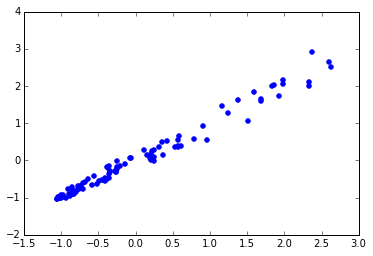

In [25]:
for i in range(len(X_train)):
    plt.scatter(X_train[i][1], Y_train[i], color = 'blue')

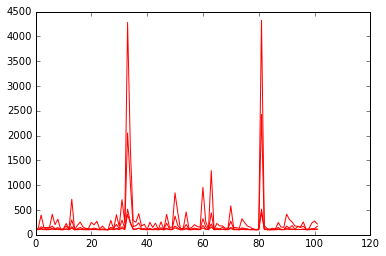

In [26]:
Xs = [i for i in range(len(X_train))]
plt.plot(np.asarray(Xs),np.asarray(calcula_error),color='red')
plt.show()

RESUMEN:

SE CUMPLIO EL OBJETIVO DESPUES DE USAR LOS DATOS DE REG LIN POLI EN 4 DIMENSIONES, SE USARON METODOS DE APRENDIZAJE SUPERVISADO, LOS CUALES NOS PERMITIERON VER DE FORMA ORDENANDA EN CADA ITERACION DIFERENTES VALORES DE W'S, CALCULANDO ETAS DE TAMAÑO REDUCIDO Y VALIDANDO EL MEJOR USO DE LAS LAMBDAS EN SU FORMA RIDGE LAMBDA SEGUN LO VISTO EN CLASE.

EL ULTIMO GRAFICO DENOTA LA VARIABILIDAD DE LOS ERRORES, EL CUAL AL SELECCIONAR NO DA EL MEJOR CONJUNTO DE W'S 

CUANDO SE ESTA APRENDIENDO A PROGRAMAR ES MAS SENCILLO HACER ESTE MODELO EN 1 SOLA DIMENSION, YA QUE LAS 4 DIMENSIONES POR LAS APPS D